In [11]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
def sigmoid(x: np.ndarray):
    return 1 / (1 + np.exp(-x))

## Активации

In [14]:
def ReLU(x: np.ndarray):
    return np.where(x > 0, x, 0)
def dReLU(x: np.ndarray):
    return np.where(x > 0, 1, 0)

def ReLU6(x: np.ndarray):
    return np.where(x > 0, np.where(x < 6, x, 6), 0)
def dReLU6(x: np.ndarray):
    return np.where((x > 0) & (x < 6), 1, 0)

def ELU(x: np.ndarray, alpha=1):
    return np.where(x < 0, alpha*(np.exp(x) - 1), x)
def dELU(x: np.ndarray, alpha=1):
    return np.where(x < 0, alpha*np.exp(x), 1)

def SiLU(x: np.ndarray):
    return x * sigmoid(x)
def dSiLU(x: np.ndarray):
    return sigmoid(x) * (1 + x * (1 - sigmoid(x)))

def Softplus(x: np.ndarray):
    return np.log1p(np.exp(x))
def dSoftplus(x: np.ndarray):
    return sigmoid(x)

In [26]:
func = [ReLU, ReLU6, ELU, SiLU, Softplus]
dfunc = [dReLU, dReLU6, dELU, dSiLU, dSoftplus]
names = ['ReLU', 'ReLU6', 'ELU', 'SiLU', 'Softplus']

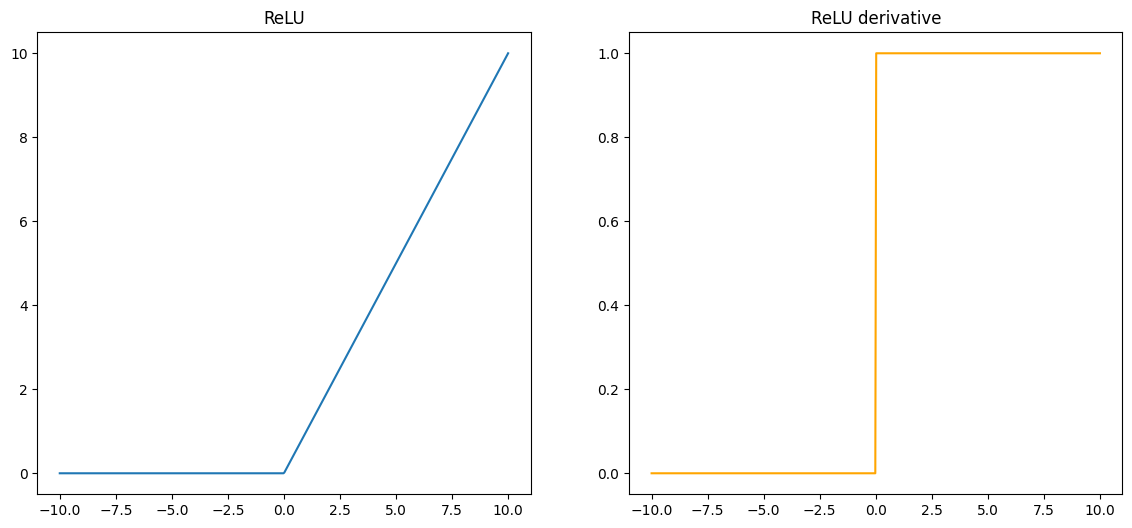

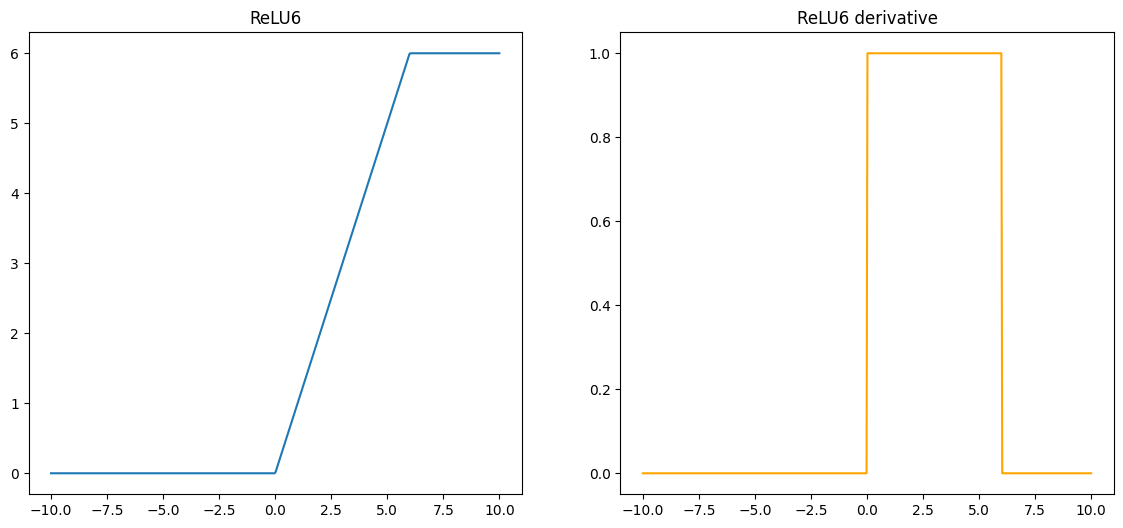

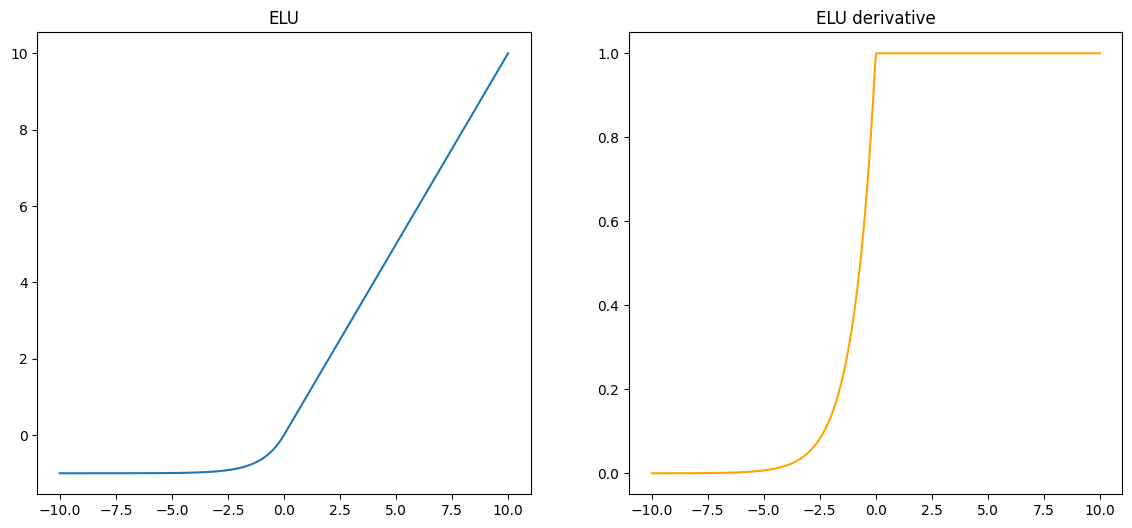

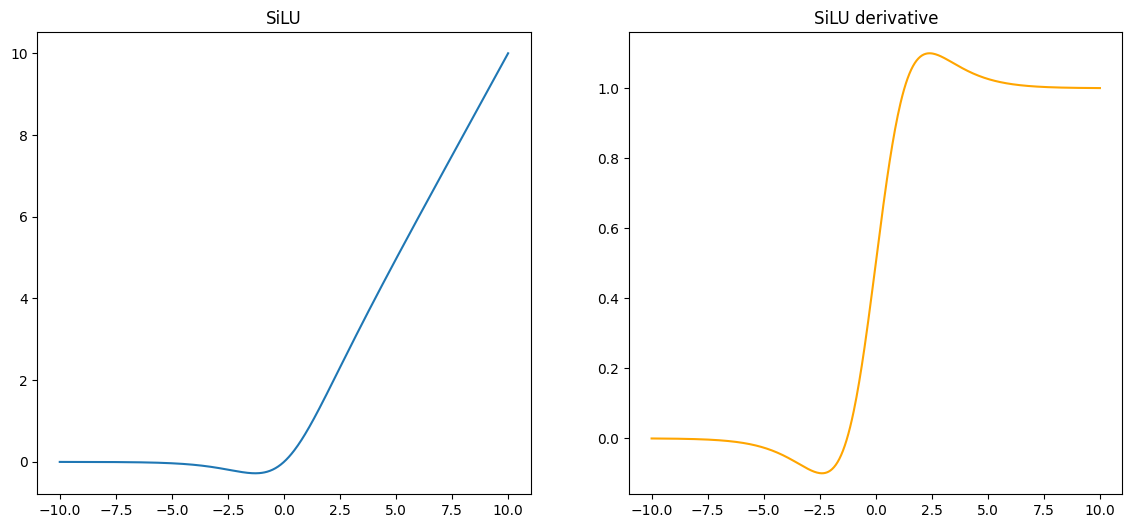

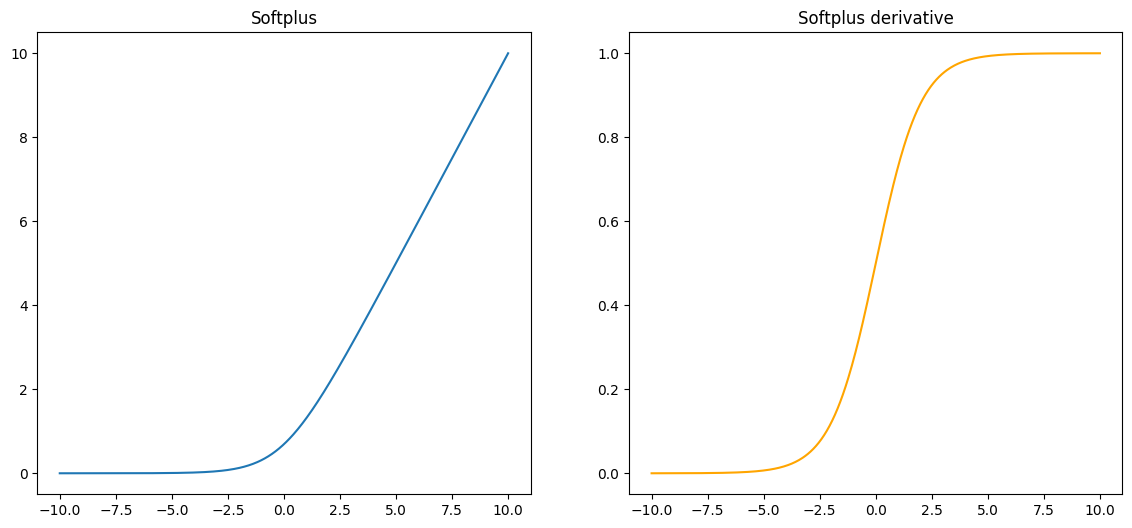

In [30]:
x = np.linspace(-10, 10, 500)

for f, df, name in zip(func, dfunc, names):
    y = f(x)
    dy = df(x)
    
    plt.figure(figsize=(14, 6))

    plt.subplot(1, 2, 1)
    plt.plot(x, y)
    plt.title(name)
    
    plt.subplot(1, 2, 2)
    plt.plot(x, dy, color='orange')
    plt.title(f'{name} derivative')

## Функции потерь

In [32]:
def L1(y_pred: np.ndarray, y_true: np.ndarray):
    return np.abs(y_pred - y_true)
def dL1(y_pred: np.ndarray, y_true: np.ndarray):
    return np.sign(y_pred - y_true)

def SE(y_pred: np.ndarray, y_true: np.ndarray):
    return (y_pred - y_true) ** 2
def dSE(y_pred: np.ndarray, y_true: np.ndarray):
    return 2 * (y_pred - y_true)

def SmoothL1(y_pred: np.ndarray, y_true: np.ndarray):
    diff = y_pred - y_true
    return np.where(np.abs(diff) < 1, 0.5 * diff ** 2, np.abs(diff) - 0.5)
def dSmoothL1(y_pred: np.ndarray, y_true: np.ndarray):
    diff = y_pred - y_true
    return np.where(np.abs(diff) < 1, diff, np.sign(diff))

In [34]:
f2 = [L1, SE, SmoothL1]
df2 = [dL1, dSE, dSmoothL1]
names = ['L1', 'SE', 'SmoothL1']

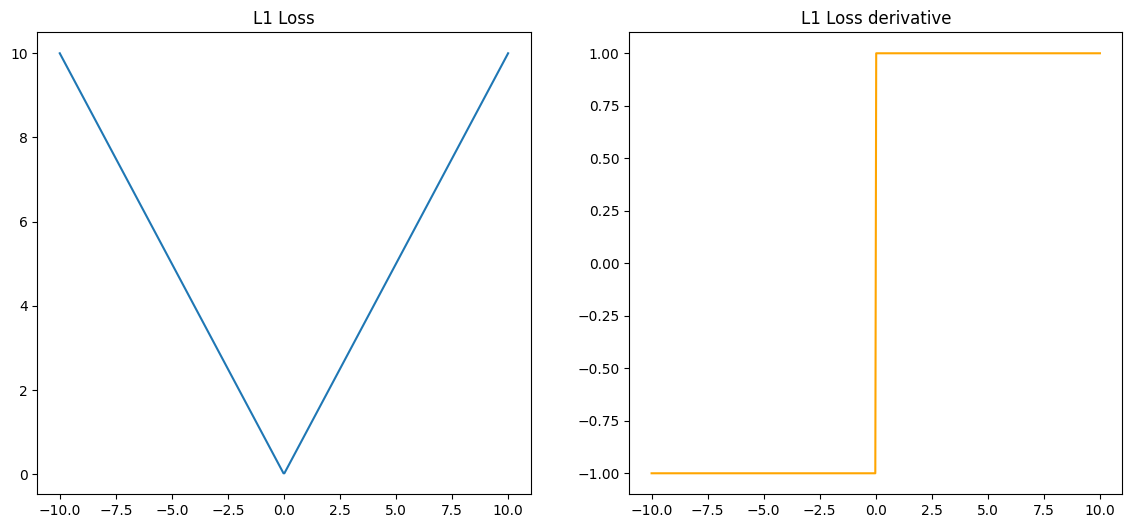

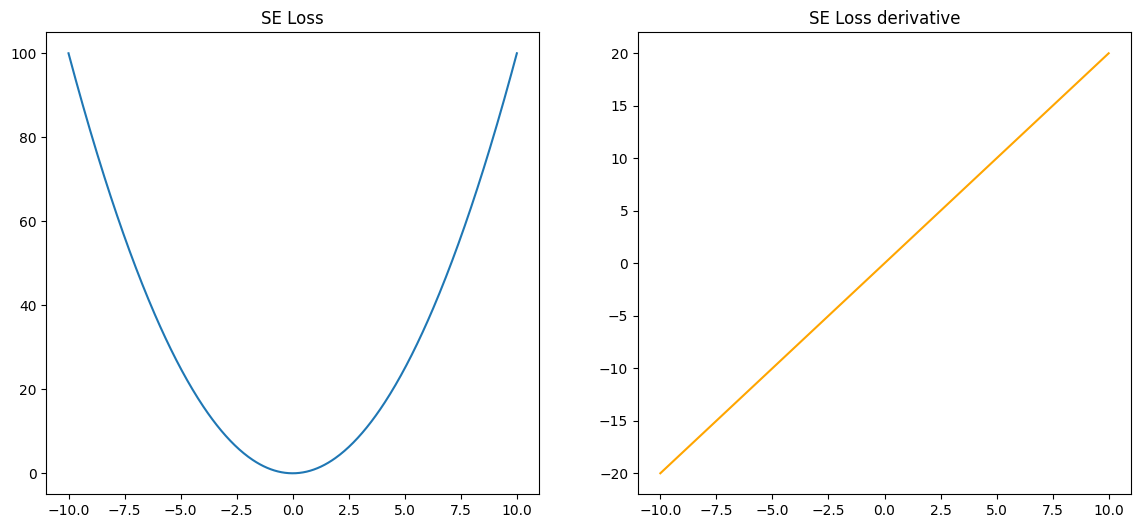

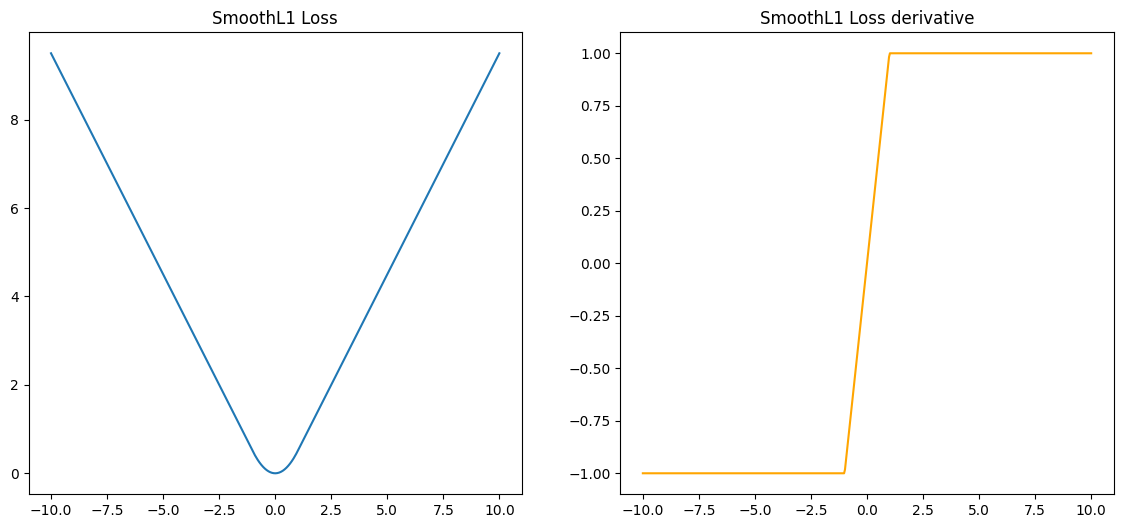

In [39]:
y_pred = np.linspace(-10, 10, 500)
y_true = np.zeros_like(y_pred)

for f, df, name in zip(f2, df2, names):
    y = f(y_pred, y_true)
    dy = df(y_pred, y_true)
    
    plt.figure(figsize=(14, 6))

    plt.subplot(1, 2, 1)
    plt.plot(y_pred, y)
    plt.title(f'{name}')

    plt.subplot(1, 2, 2)
    plt.plot(y_pred, dy, color='orange')
    plt.title(f'{name} derivative')